In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
from pathlib import Path
import os



In [ ]:
root_dir = 

In [2]:
from pathlib import Path
import os

In [34]:
import re


Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)



In [35]:
root_dir = r"C:\Users\ADMIN\AI curriculum\nepali news dataset"
data = []

def clean_text(text):
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    return text

for root, dirs, files in os.walk(root_dir):
    category = os.path.basename(root)

    for file in files:
        if file.endswith(".txt"):
            file_path = os.path.join(root, file)

            with open(file_path, "r", encoding="utf-8") as f:
                text = f.read().strip()
            
            text = clean_text(text)

            data.append({
                "text": text,
                "category": category
            })

In [36]:
df = pd.DataFrame(data)


In [37]:
df.to_csv("nepali_news.csv", index=False, encoding="utf-8")


In [51]:
df = pd.read_csv("nepali_news.csv")
df.head()

,text,category
0,"घर जग्गा कारोबारमा आत्मविश्वास गुमेको वर्ष""बैं...",ArthaBanijya
1,सहायताको प्राथमिकता तोक्न आयोजना बैंकप्राथमिकत...,ArthaBanijya
2,व्यापारीको बेइमानीले सर्वसाधारणलाई सास्तीपेट्र...,ArthaBanijya
3,मोबाइल सेट आयातमा टाइप एप्रुभल लागूसरकारले मोब...,ArthaBanijya
4,रारामा रिसोर्ट र पर्यटक सेवा केन्द्र बन्नेदेशक...,ArthaBanijya


In [52]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      10000 non-null  object
 1   category  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB
None


In [45]:
X=df['text']
y=df['category']

In [53]:
y

0       ArthaBanijya
1       ArthaBanijya
2       ArthaBanijya
3       ArthaBanijya
4       ArthaBanijya
            ...     
9995           Viswa
9996           Viswa
9997           Viswa
9998           Viswa
9999           Viswa
Name: category, Length: 10000, dtype: object

In [54]:
category_names = df['category'].unique()
print(category_names)

['ArthaBanijya' 'Bichar' 'Desh' 'Khelkud' 'Manoranjan' 'Prabas' 'Sahitya'
 'SuchanaPrabidhi' 'Swasthya' 'Viswa']


In [55]:
value_counts=df['category'].value_counts()

Text(0.5, 1.0, 'Categories Distribution')

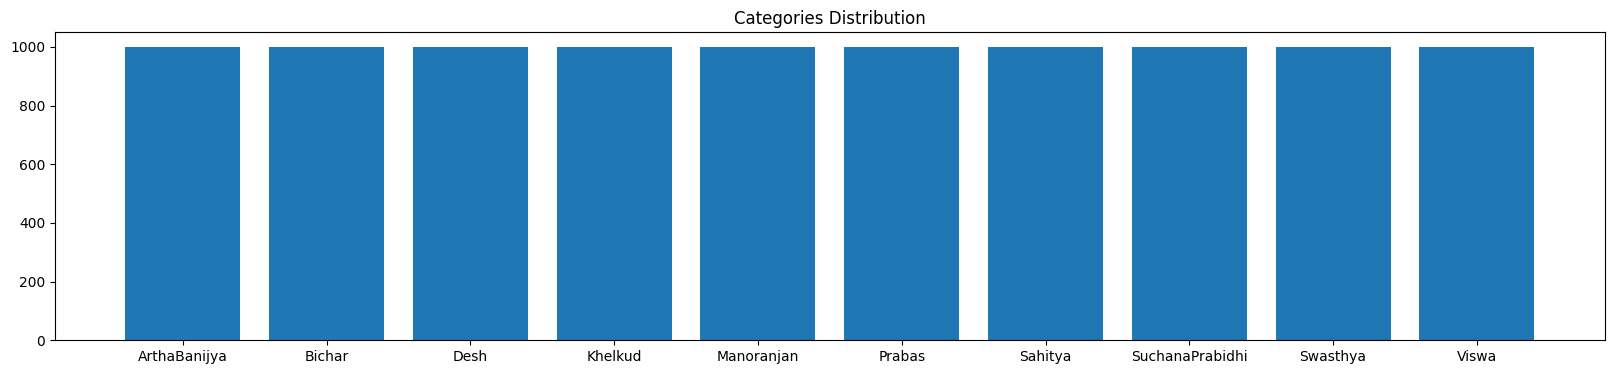

In [56]:
plt.figure(figsize=(20,4))
plt.bar(x=category_names,height = value_counts)
plt.title("Categories Distribution")

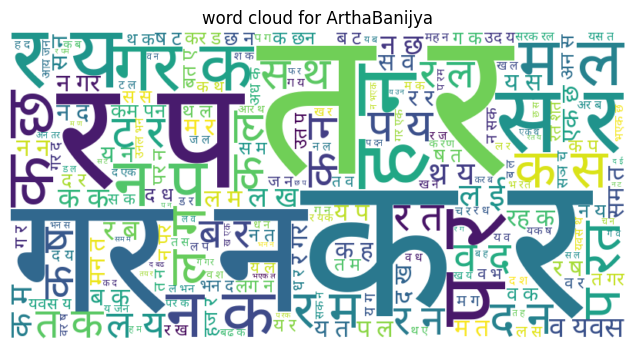

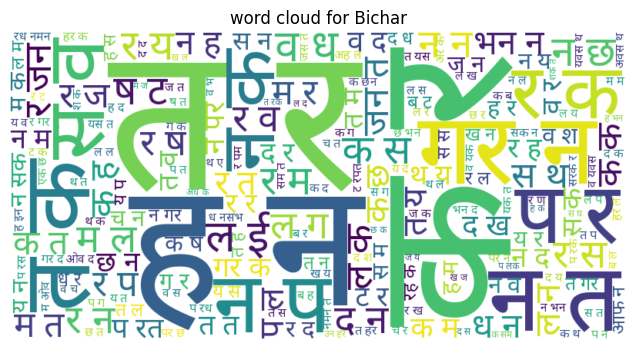

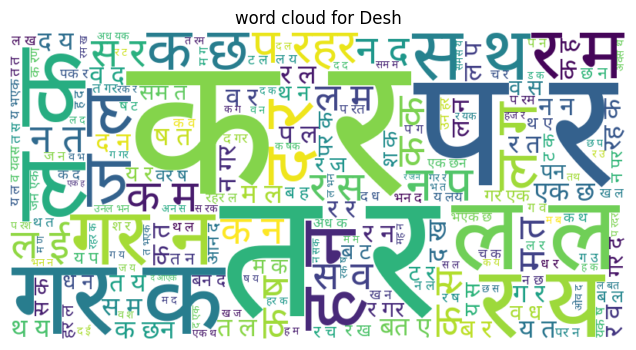

KeyboardInterrupt: 

In [24]:
from wordcloud  import WordCloud
for category in category_names:
    text =" ".join(df[df['category']==category]['text'].values)
    wordcloud = WordCloud(
        width =800 ,height=400 ,background_color="white", font_path="devanagari-font.ttf"
    ).generate(text)
    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'word cloud for {category}')
    plt.axis('off')
    plt.show()
  


In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(8000,)
(2000,)


In [50]:
X_train

9254    उपचारपछि चाभेज स्वदेश फिर्ताभेनेजुएलाको राष्ट्...
1561    संघीय गठबन्धनसँग जोडिएको आधुनिकताएमाओवादीका अध...
1670    संघवादीहरूको उत्तरको प्रतीक्षामाटाट पल्टिने अव...
6087    टीकाको कुनै दिनआधुनिक संगीतमा कहलिएका टीका भण्...
6669    विश्व कविता महोत्सवमा तुलसीसाहित्यकार तथा संस्...
                              ...                        
5734    ओमनमा नेपालीद्वारा आत्महत्याओमनको राजधानी मस्क...
5191    अमेरिकी एनआरएनद्धारा राजदुतलाई ज्ञापनपत्रसंविध...
5390    माओवादी नेतालाई भारतमा सफाइभारतको बिहार राज्यस...
860     प्रभावकारी भए साना ट्युबेलबाँके र बर्दियामा मह...
7270    कलर्सका नयाँ टच फोन"कलर्स मोबाइलले नयाँ टच फोन...
Name: text, Length: 8000, dtype: object

In [59]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [61]:
nb_model = make_pipeline(TfidfVectorizer(stop_words= ["english"]),MultinomialNB())
nb_model.fit(X_train,y_train)
y_pred = nb_model.predict(X_test)
accuracy_score(y_test,y_pred)


0.724

In [28]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

   ArthaBanijya       0.75      0.81      0.78       208
         Bichar       0.38      0.99      0.55       202
           Desh       0.92      0.53      0.67       192
        Khelkud       0.98      0.91      0.94       201
     Manoranjan       0.72      0.62      0.67       209
         Prabas       0.84      0.61      0.71       186
        Sahitya       0.72      0.56      0.63       211
SuchanaPrabidhi       0.97      0.73      0.83       204
       Swasthya       0.93      0.83      0.88       212
          Viswa       0.84      0.62      0.71       175

       accuracy                           0.72      2000
      macro avg       0.80      0.72      0.74      2000
   weighted avg       0.80      0.72      0.74      2000



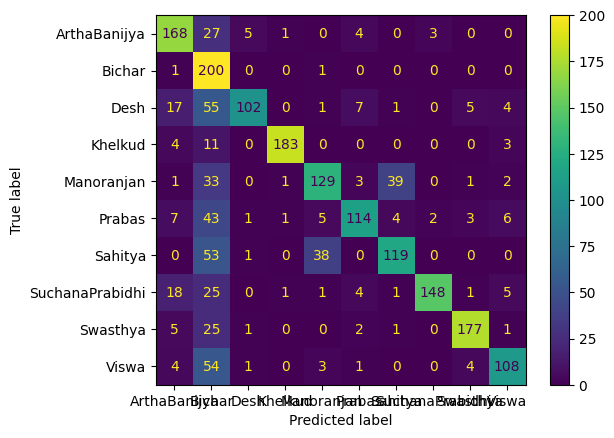

In [30]:
cm=confusion_matrix(y_test,y_pred)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=df['category'].unique())
cm_plot.plot()
plt.show()

In [31]:
text =["कम बोल्ने र एकै ठाउँमा धेरै नबस्ने बालेन भूगोल र संस्कृतिसँग घुलमिल हुने प्रयास गरिरहेका छन् । उनले प्रतिस्पर्धी केपी शर्मा ओलीलाई सांकेतिक रूपमा काउन्टर पनि दिइरहेका छन् ।"]
prediction= nb_model.predict(text)
for i in range(0, len(text)):
    print(f'text:{text[i]}\npredicted category:{prediction[i]}')

text:कम बोल्ने र एकै ठाउँमा धेरै नबस्ने बालेन भूगोल र संस्कृतिसँग घुलमिल हुने प्रयास गरिरहेका छन् । उनले प्रतिस्पर्धी केपी शर्मा ओलीलाई सांकेतिक रूपमा काउन्टर पनि दिइरहेका छन् ।
predicted category:Bichar


In [32]:
import joblib 
joblib.dump(nb_model,'news_classification_nepali.joblib')
print("SUCCESS")


SUCCESS
